# Install the required libraries
- `!pip install selenium`
- `!pip install webdriver-manager`

In [1]:
# import the required libraries
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.remote.webelement import WebElement
from selenium.webdriver.remote.webdriver import WebDriver
import time
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import os

In [2]:
URL_LINK = 'https://en.wikipedia.org/wiki/List_of_universities_in_Nigeria'


# open the webpage
def open_webpage(url: str) -> WebDriver:
    chromeOptions = webdriver.ChromeOptions()
    chromeOptions.add_argument("--start-maximized")
    chromeOptions.add_argument('--headless')
    driver: WebDriver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chromeOptions)
    driver.get(url)
    time.sleep(6)
    return driver
    


def save_table_data(driver: WebDriver) -> List[List[str]]:
    table_header: List[str] = []
    thead: WebElement = driver.find_element(by=By.TAG_NAME, value="thead")
    thead_th: List[WebElement] = thead.find_elements(by=By.TAG_NAME, value="th")
        
    for th_row in thead_th:
        table_header.append(th_row.text)
    
    # Get all the tr tags
    tr_tags: List[WebElement] = driver.find_elements(by=By.TAG_NAME, value="tr")
    table_data: List[str] = []
        
    for t_row in tr_tags:
        td_tags: List[WebElement] = t_row.find_elements(by=By.TAG_NAME, value="td")
        temp_list: list = []
        for t_data in td_tags:
            temp_list.append(t_data.text)      
        if temp_list and len(temp_list) > 1:
            table_data.append(temp_list)
    driver.quit()
    return [table_header, table_data]
        

# write the data to csv
def write_data_to_csv(data_to_write: List[List[str]], csv_filename: str) -> None:
    table_header, table_data = data_to_write[0], data_to_write[1]
    with open(csv_filename, 'w', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(table_header)
        for data in table_data:
            writer.writerow(data)

In [3]:
write_data_to_csv(save_table_data(open_webpage(URL_LINK)), "uni_nigerian.csv")
univeristies = pd.read_csv("uni_nigerian.csv")
univeristies.head(5)



====== WebDriver manager ======
Current google-chrome version is 101.0.4951
Get LATEST chromedriver version for 101.0.4951 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/101.0.4951.41/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\okeyb\.wdm\drivers\chromedriver\win32\101.0.4951.41]


,Name,State,Abbreviation,Location,Funding,Founded
0,Adekunle Ajasin University,Ondo,AAUA,Akungba-Akoko,State,1999
1,Obafemi Awolowo University,Osun,OAU,Ile Ife,Federal,1961
2,Abia State University,Abia,ABSU,Uturu,State,1981
3,Joseph Ayo Babalola University,Osun,JABU,Ikeji-Arakeji,Private,2006
4,Redeemer's University Nigeria,Osun,RUN,Ede,Private,2005


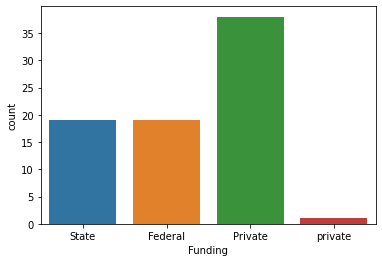

In [4]:
# Show the distribution of funding
sns.countplot(data=univeristies, x="Funding")
plt.show()

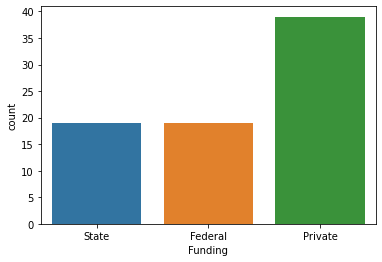

In [5]:
univeristies["Funding"] = univeristies["Funding"].str.capitalize()
sns.countplot(data=univeristies, x="Funding")
plt.show()

In [6]:
URL_LINK="https://www.investopedia.com/insights/worlds-top-economies/"
write_data_to_csv(save_table_data(open_webpage(URL_LINK)), "economies.csv")
economies = pd.read_csv("economies.csv")
economies.head(5)



====== WebDriver manager ======
Current google-chrome version is 101.0.4951
Get LATEST chromedriver version for 101.0.4951 google-chrome
Driver [C:\Users\okeyb\.wdm\drivers\chromedriver\win32\101.0.4951.41\chromedriver.exe] found in cache


,,,,Top Ten Countries by Nominal GDP at Current U.S. Dollar Exchange Rates
Country,Nominal GDP (in trillions),PPP Adjusted GDP (in trillions),Annual Growth (%),GDP Per Capita
United States,$20.89,$20.89,-3.6%,"$63,413.5"
China,$14.72,$24.27,2.3%,"$10,434.8"
Japan,$5.06,$5.25,-4.6%,"$40,193.3"
Germany,$3.85,$4.52,-4.6%,"$46,208.4"


In [7]:
economies = pd.read_csv("economies.csv", header=1)
economies.head(5)

,Country,Nominal GDP (in trillions),PPP Adjusted GDP (in trillions),Annual Growth (%),GDP Per Capita
0,United States,$20.89,$20.89,-3.6%,"$63,413.5"
1,China,$14.72,$24.27,2.3%,"$10,434.8"
2,Japan,$5.06,$5.25,-4.6%,"$40,193.3"
3,Germany,$3.85,$4.52,-4.6%,"$46,208.4"
4,United Kingdom,$2.76,$3.08,-9.7%,"$41,124.5"
